###  Library

Pada kode ini, beberapa library diimpor untuk mendukung proses pengolahan gambar. Library `numpy` digunakan untuk manipulasi array multidimensi yang efisien, seperti representasi gambar dalam bentuk array. Library `matplotlib.pyplot` digunakan untuk visualisasi data, termasuk menampilkan gambar hasil pengolahan. Fungsi `mpimg` dari modul `matplotlib.image` digunakan untuk membaca file gambar dengan format yang didukung, seperti JPEG dan PNG. Selain itu, library `cv2` dari OpenCV diimpor untuk mendukung berbagai operasi pengolahan gambar, seperti konversi warna, deteksi tepi, dan penerapan filter. Kombinasi library ini memungkinkan pengguna untuk melakukan analisis dan transformasi gambar secara komprehensif.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

### Membaca Gambar Adudu
Gambar asli `adudu` dibaca menggunakan fungsi `mpimg.imread` dari modul Matplotlib. Fungsi ini digunakan untuk membaca file gambar dengan format yang didukung, seperti JPEG, PNG, dan lainnya. Setelah gambar berhasil dimuat ke dalam variabel `adudu`, gambar tersebut divisualisasikan menggunakan fungsi `plt.imshow`. Fungsi ini menampilkan gambar dalam bentuk array dengan warna aslinya. Proses ini memungkinkan pengguna untuk melihat gambar asli sebelum dilakukan pengolahan lebih lanjut.

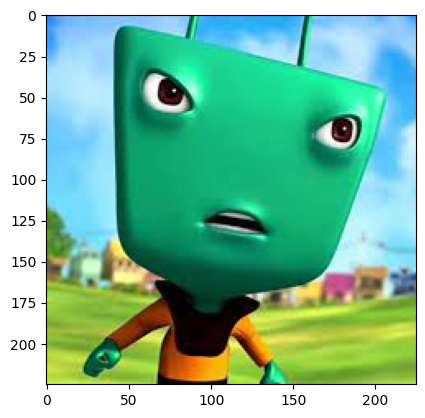

In [68]:
adudu = mpimg.imread('adudu.jpg')
plt.imshow(adudu)

### Proses Pengolahan Gambar Adudu

Pada proses ini, gambar asli `adudu` dibaca menggunakan fungsi `plt.imread` dan diubah menjadi gambar grayscale menggunakan fungsi `ubah_ke_gray`. Selanjutnya, gambar grayscale tersebut diproses menggunakan berbagai filter untuk menghasilkan beberapa transformasi gambar. Filter mean diterapkan dengan ukuran kernel 3x3 dan 9x9 melalui fungsi `filter_mean`, menghasilkan gambar `adudu_mean_3x3` dan `adudu_mean_9x9`. Filter sharpening diterapkan menggunakan fungsi `filter_sharpening`, menghasilkan gambar `adudu_sharpening`. Filter smoothing diterapkan menggunakan fungsi `filter_smoothing`, menghasilkan gambar `adudu_smoothing`. Selain itu, filter modus diterapkan dengan ukuran kernel 3x3 dan 5x5 melalui fungsi `filter_modus`, menghasilkan gambar `adudu_modus_3x3` dan `adudu_modus_9x9`. Filter median juga diterapkan dengan ukuran kernel 3x3 dan 9x9 melalui fungsi `filter_median`, menghasilkan gambar `adudu_median_3x3` dan `adudu_median_9x9`. Hasil dari setiap filter divisualisasikan menggunakan Matplotlib. Gambar pertama hingga kedelapan masing-masing menunjukkan hasil dari filter mean, sharpening, smoothing, modus, dan median dengan berbagai ukuran kernel. Visualisasi ini memberikan gambaran yang jelas tentang bagaimana setiap filter memengaruhi gambar grayscale.

Text(0.5, 1.0, 'Median 9x9')

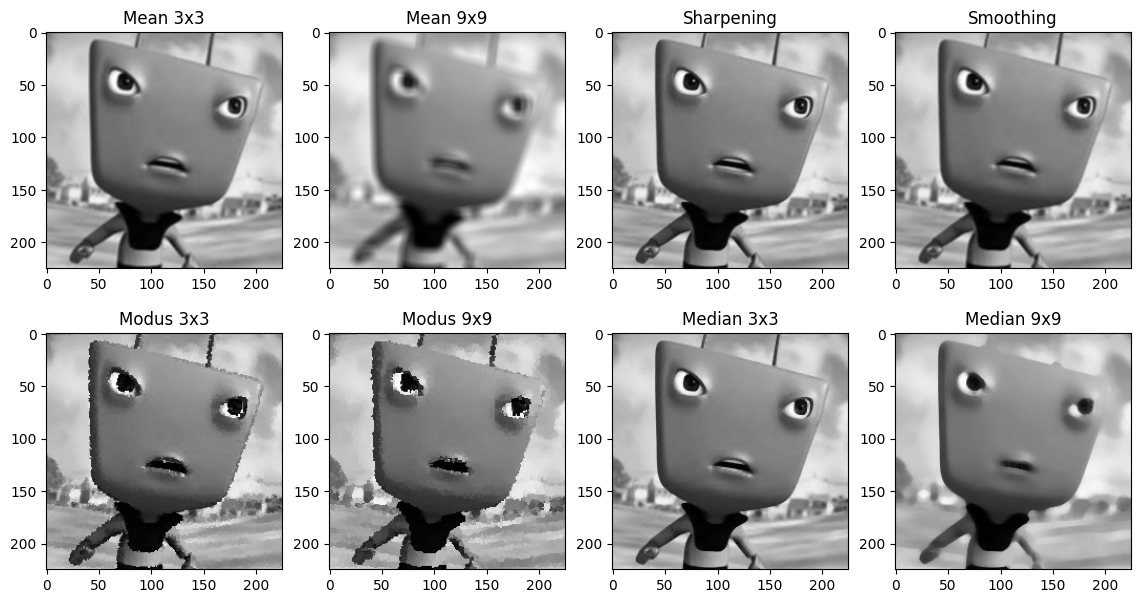

In [69]:
def ubah_ke_gray(gambar):
    if gambar.ndim == 3:
        return np.dot(gambar[...,:3], [0.2989, 0.5870, 0.1140])
    return gambar

def filter_mean(gambar, ukuran):
    half_size = ukuran // 2
    padded = np.pad(gambar, ((half_size, half_size), (half_size, half_size)), mode='edge')
    out = np.zeros_like(gambar, dtype=float)
    for i in range(gambar.shape[0]):
        for j in range(gambar.shape[1]):
            window = padded[i:i+ukuran, j:j+ukuran]
            out[i, j] = np.sum(window) / (ukuran * ukuran)
    return out

def filter_sharpening(gambar):
    kernel = np.array([[1/9, 1/9, 1/9],
                       [1/9, 8/9, 1/9],
                       [1/9, 1/9, 1/9]])
    half_size = 1
    padded = np.pad(gambar, ((half_size, half_size), (half_size, half_size)), mode='edge')
    out = np.zeros_like(gambar, dtype=float)
    for i in range(gambar.shape[0]):
        for j in range(gambar.shape[1]):
            window = padded[i:i+3, j:j+3]
            out[i, j] = np.sum(window * kernel)
    return out

def filter_smoothing(gambar):
    kernel = np.array([[1/10, 1/10, 1/10],
                       [1/10, 1/5, 1/10],
                       [1/10, 1/10, 1/10]])
    m, n = gambar.shape
    padded = np.pad(gambar, ((1, 1), (1, 1)), mode='edge')
    out = np.zeros_like(gambar, dtype=float)
    for i in range(m):
        for j in range(n):
            window = padded[i:i+3, j:j+3]
            out[i, j] = (window * kernel).sum()
    return out

def filter_modus(gambar, ukuran):
    half_size = ukuran // 2
    padded = np.pad(gambar, ((half_size, half_size), (half_size, half_size)), mode='edge')
    modus = np.zeros_like(gambar)

    for i in range(gambar.shape[0]):
        for j in range(gambar.shape[1]):
            window = padded[i:i+ukuran, j:j+ukuran].flatten()
            modus[i, j] = np.bincount(window.astype(int)).argmax()

    return modus

def filter_median(gambar, ukuran):
    half_size = ukuran // 2
    padded = np.pad(gambar, ((half_size, half_size), (half_size, half_size)), mode='edge')
    median = np.zeros_like(gambar)

    for i in range(gambar.shape[0]):
        for j in range(gambar.shape[1]):
            window = padded[i:i+ukuran, j:j+ukuran].flatten()
            median[i, j] = np.median(window)

    return median

adudu = plt.imread('adudu.jpg')
adudu_gray = ubah_ke_gray(adudu)

adudu_mean_3x3 = filter_mean(adudu_gray, 3)
adudu_mean_9x9 = filter_mean(adudu_gray, 9)
adudu_sharpening = filter_sharpening(adudu_gray)
adudu_smoothing = filter_smoothing(adudu_gray)
adudu_modus_3x3 = filter_modus(adudu_gray, 3)
adudu_modus_9x9 = filter_modus(adudu_gray, 5)
adudu_median_3x3 = filter_median(adudu_gray, 3)
adudu_median_9x9 = filter_median(adudu_gray, 9)

plt.figure(figsize=(14, 15))
plt.subplot(4,4,1)
plt.imshow(adudu_mean_3x3, cmap='gray')
plt.title('Mean 3x3')

plt.subplot(4,4,2)
plt.imshow(adudu_mean_9x9, cmap='gray')
plt.title('Mean 9x9')

plt.subplot(4,4,3)
plt.imshow(adudu_sharpening, cmap='gray')
plt.title('Sharpening')

plt.subplot(4,4,4)
plt.imshow(adudu_smoothing, cmap='gray')
plt.title('Smoothing')

plt.subplot(4,4,5)
plt.imshow(adudu_modus_3x3, cmap='gray')
plt.title('Modus 3x3')

plt.subplot(4,4,6)
plt.imshow(adudu_modus_9x9, cmap='gray')
plt.title('Modus 9x9')

plt.subplot(4,4,7)
plt.imshow(adudu_median_3x3, cmap='gray')
plt.title('Median 3x3')

plt.subplot(4,4,8)
plt.imshow(adudu_median_9x9, cmap='gray')
plt.title('Median 9x9')



### Operasi Robert pada Berbagai Filter Gambar Adudu

Operasi Robert diterapkan pada berbagai hasil filter gambar Adudu untuk mendeteksi tepi berdasarkan gradien intensitas. Operasi ini menggunakan dua kernel, yaitu kernel horizontal (`kernel_x`) dan kernel vertikal (`kernel_y`), untuk menghitung gradien pada sumbu x dan y. Hasil dari operasi ini adalah magnitudo gradien yang merepresentasikan tepi pada gambar. Beberapa hasil filter yang diproses dengan operasi Robert meliputi `adudu_mean_3x3`, `adudu_mean_9x9`, `adudu_sharpening`, `adudu_smoothing`, `adudu_modus_3x3`, `adudu_modus_9x9`, `adudu_median_3x3`, dan `adudu_median_9x9`. 
Hasil dari setiap proses divisualisasikan menggunakan Matplotlib. Gambar pertama (`adudu_mean_3x3_robert`) menunjukkan hasil operasi Robert pada filter mean dengan kernel 3x3, sedangkan gambar kedua (`adudu_mean_9x9_robert`) menunjukkan hasil pada kernel 9x9. Gambar ketiga (`adudu_sharpening_robert`) dan keempat (`adudu_smoothing_robert`) masing-masing menunjukkan hasil pada filter sharpening dan smoothing. Selanjutnya, gambar kelima hingga kedelapan menampilkan hasil operasi Robert pada filter modus dan median dengan kernel 3x3 dan 9x9. Visualisasi ini memberikan gambaran yang jelas tentang bagaimana operasi Robert mendeteksi tepi pada berbagai hasil filter gambar.

Text(0.5, 1.0, 'Median 9x9 Robert')

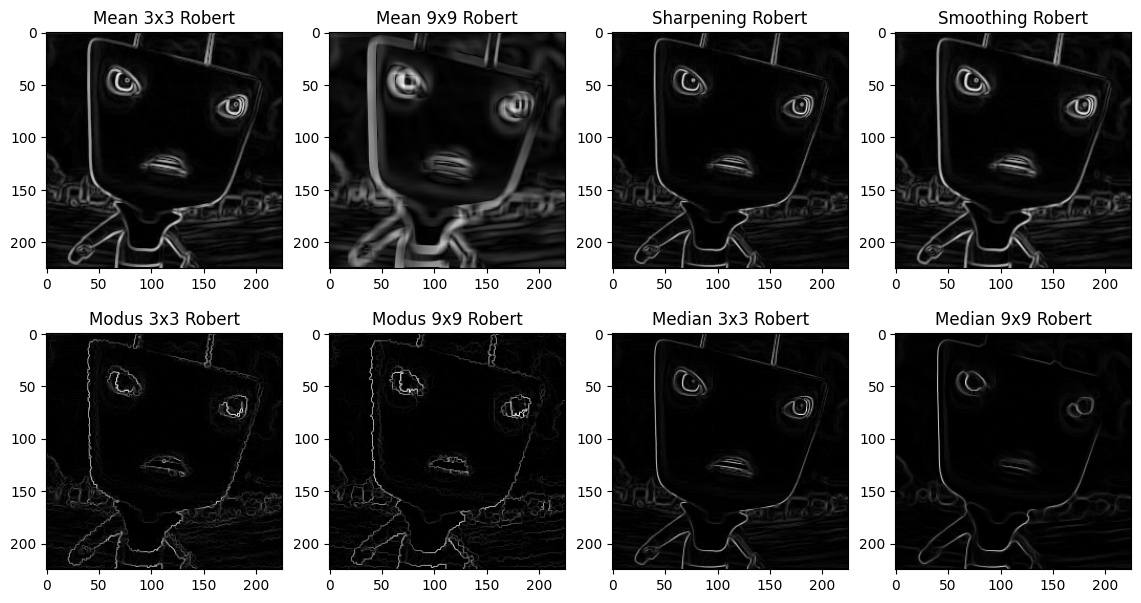

In [70]:
def operasi_robert(gambar):
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])
    
    m, n = gambar.shape
    sobel_x = np.zeros((m, n), dtype=float)
    sobel_y = np.zeros((m, n), dtype=float)
    
    padded = np.pad(gambar, ((0, 1), (0, 1)), mode='edge')
    
    for i in range(m):
        for j in range(n):
            patch = padded[i:i+2, j:j+2]
            sobel_x[i, j] = (patch * kernel_x).sum()
            sobel_y[i, j] = (patch * kernel_y).sum()
            
    return np.sqrt(sobel_x**2 + sobel_y**2)

adudu_mean_3x3_robert = operasi_robert(adudu_mean_3x3)
adudu_mean_9x9_robert = operasi_robert(adudu_mean_9x9)
adudu_sharpening_robert = operasi_robert(adudu_sharpening)
adudu_smoothing_robert = operasi_robert(adudu_smoothing)
adudu_modus_3x3_robert = operasi_robert(adudu_modus_3x3)
adudu_modus_9x9_robert = operasi_robert(adudu_modus_9x9)
adudu_median_3x3_robert = operasi_robert(adudu_median_3x3)
adudu_median_9x9_robert = operasi_robert(adudu_median_9x9)

plt.figure(figsize=(14, 15))
plt.subplot(4,4,1)
plt.imshow(adudu_mean_3x3_robert, cmap='gray')
plt.title('Mean 3x3 Robert')

plt.subplot(4,4,2)
plt.imshow(adudu_mean_9x9_robert, cmap='gray')
plt.title('Mean 9x9 Robert')

plt.subplot(4,4,3)
plt.imshow(adudu_sharpening_robert, cmap='gray')
plt.title('Sharpening Robert')

plt.subplot(4,4,4)
plt.imshow(adudu_smoothing_robert, cmap='gray')
plt.title('Smoothing Robert')

plt.subplot(4,4,5)
plt.imshow(adudu_modus_3x3_robert, cmap='gray')
plt.title('Modus 3x3 Robert')

plt.subplot(4,4,6)
plt.imshow(adudu_modus_9x9_robert, cmap='gray')
plt.title('Modus 9x9 Robert')

plt.subplot(4,4,7)
plt.imshow(adudu_median_3x3_robert, cmap='gray')
plt.title('Median 3x3 Robert')

plt.subplot(4,4,8)
plt.imshow(adudu_median_9x9_robert, cmap='gray')
plt.title('Median 9x9 Robert')

### Operasi Sobel pada Berbagai Filter Gambar Adudu

Operasi Sobel diterapkan pada berbagai hasil filter gambar Adudu untuk mendeteksi tepi berdasarkan gradien intensitas. Operasi ini menggunakan dua kernel, yaitu kernel horizontal (`kernel_x`) dan kernel vertikal (`kernel_y`), untuk menghitung gradien pada sumbu x dan y. Hasil dari operasi ini adalah magnitudo gradien yang merepresentasikan tepi pada gambar. Beberapa hasil filter yang diproses dengan operasi Sobel meliputi `adudu_mean_3x3`, `adudu_mean_9x9`, `adudu_sharpening`, `adudu_smoothing`, `adudu_modus_3x3`, `adudu_modus_9x9`, `adudu_median_3x3`, dan `adudu_median_9x9`. 
Hasil dari setiap proses divisualisasikan menggunakan Matplotlib. Gambar pertama (`adudu_mean_3x3_sobel`) menunjukkan hasil operasi Sobel pada filter mean dengan kernel 3x3, sedangkan gambar kedua (`adudu_mean_9x9_sobel`) menunjukkan hasil pada kernel 9x9. Gambar ketiga (`adudu_sharpening_sobel`) dan keempat (`adudu_smoothing_sobel`) masing-masing menunjukkan hasil pada filter sharpening dan smoothing. Selanjutnya, gambar kelima hingga kedelapan menampilkan hasil operasi Sobel pada filter modus dan median dengan kernel 3x3 dan 9x9. Visualisasi ini memberikan gambaran yang jelas tentang bagaimana operasi Sobel mendeteksi tepi pada berbagai hasil filter gambar.

Text(0.5, 1.0, 'Median 9x9 Sobel')

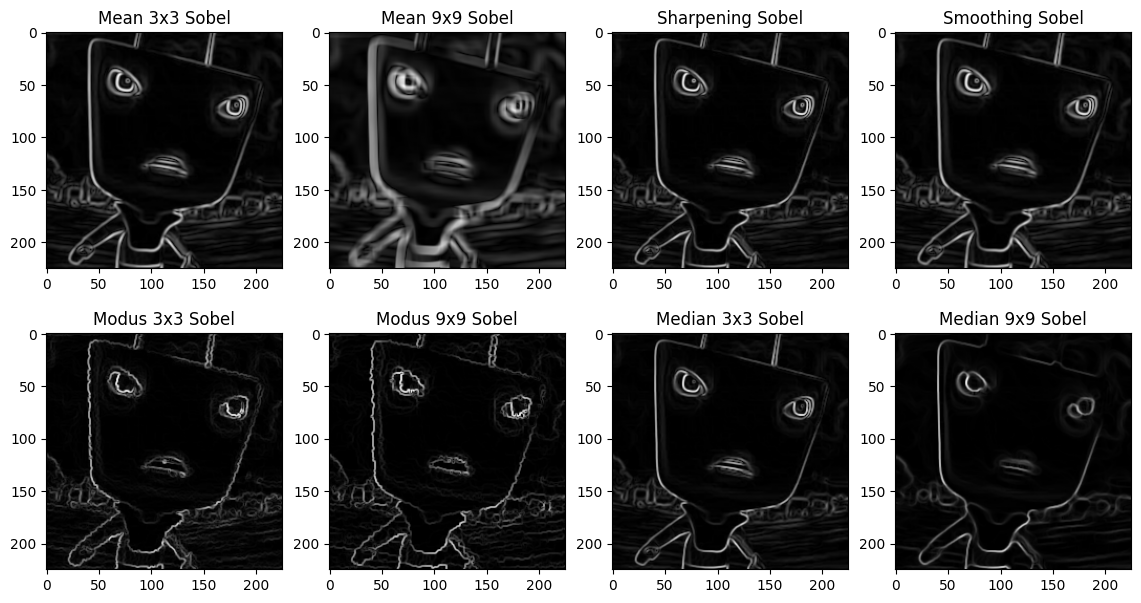

In [71]:
def operasi_sobel(gambar):
    kernel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    m, n = gambar.shape
    sobel_x = np.zeros((m, n), dtype=float)
    sobel_y = np.zeros((m, n), dtype=float)
    
    padded = np.pad(gambar, ((1, 1), (1, 1)), mode='edge')
    
    for i in range(m):
        for j in range(n):
            patch = padded[i:i+3, j:j+3]
            sobel_x[i, j] = (patch * kernel_x).sum()
            sobel_y[i, j] = (patch * kernel_y).sum()
            
    return np.sqrt(sobel_x**2 + sobel_y**2)

adudu_mean_3x3_sobel = operasi_sobel(adudu_mean_3x3)
adudu_mean_9x9_sobel = operasi_sobel(adudu_mean_9x9)
adudu_sharpening_sobel = operasi_sobel(adudu_sharpening)
adudu_smoothing_sobel = operasi_sobel(adudu_smoothing)
adudu_modus_3x3_sobel = operasi_sobel(adudu_modus_3x3)
adudu_modus_9x9_sobel = operasi_sobel(adudu_modus_9x9)
adudu_median_3x3_sobel = operasi_sobel(adudu_median_3x3)
adudu_median_9x9_sobel = operasi_sobel(adudu_median_9x9)

plt.figure(figsize=(14, 15))
plt.subplot(4,4,1)
plt.imshow(adudu_mean_3x3_sobel, cmap='gray')
plt.title('Mean 3x3 Sobel')

plt.subplot(4,4,2)
plt.imshow(adudu_mean_9x9_sobel, cmap='gray')
plt.title('Mean 9x9 Sobel')

plt.subplot(4,4,3)
plt.imshow(adudu_sharpening_sobel, cmap='gray')
plt.title('Sharpening Sobel')

plt.subplot(4,4,4)
plt.imshow(adudu_smoothing_sobel, cmap='gray')
plt.title('Smoothing Sobel')

plt.subplot(4,4,5)
plt.imshow(adudu_modus_3x3_sobel, cmap='gray')
plt.title('Modus 3x3 Sobel')

plt.subplot(4,4,6)
plt.imshow(adudu_modus_9x9_sobel, cmap='gray')
plt.title('Modus 9x9 Sobel')

plt.subplot(4,4,7)
plt.imshow(adudu_median_3x3_sobel, cmap='gray')
plt.title('Median 3x3 Sobel')

plt.subplot(4,4,8)
plt.imshow(adudu_median_9x9_sobel, cmap='gray')
plt.title('Median 9x9 Sobel')

### Operasi Prewitt pada Berbagai Filter Gambar Adudu
Operasi Prewitt diterapkan pada berbagai hasil filter gambar Adudu untuk mendeteksi tepi berdasarkan gradien intensitas. Operasi ini menggunakan dua kernel, yaitu kernel horizontal (`kernel_x`) dan kernel vertikal (`kernel_y`), untuk menghitung gradien pada sumbu x dan y. Hasil dari operasi ini adalah magnitudo gradien yang merepresentasikan tepi pada gambar. Beberapa hasil filter yang diproses dengan operasi Prewitt meliputi `adudu_mean_3x3`, `adudu_mean_9x9`, `adudu_sharpening`, `adudu_smoothing`, `adudu_modus_3x3`, `adudu_modus_9x9`, `adudu_median_3x3`, dan `adudu_median_9x9`. 
Hasil dari setiap proses divisualisasikan menggunakan Matplotlib. Gambar pertama (`adudu_mean_3x3_prewitt`) menunjukkan hasil operasi Prewitt pada filter mean dengan kernel 3x3, sedangkan gambar kedua (`adudu_mean_9x9_prewitt`) menunjukkan hasil pada kernel 9x9. Gambar ketiga (`adudu_sharpening_prewitt`) dan keempat (`adudu_smoothing_prewitt`) masing-masing menunjukkan hasil pada filter sharpening dan smoothing. Selanjutnya, gambar kelima hingga kedelapan menampilkan hasil operasi Prewitt pada filter modus dan median dengan kernel 3x3 dan 9x9. Visualisasi ini memberikan gambaran yang jelas tentang bagaimana operasi Prewitt mendeteksi tepi pada berbagai hasil filter gambar.

Text(0.5, 1.0, 'Median 9x9 Prewitt')

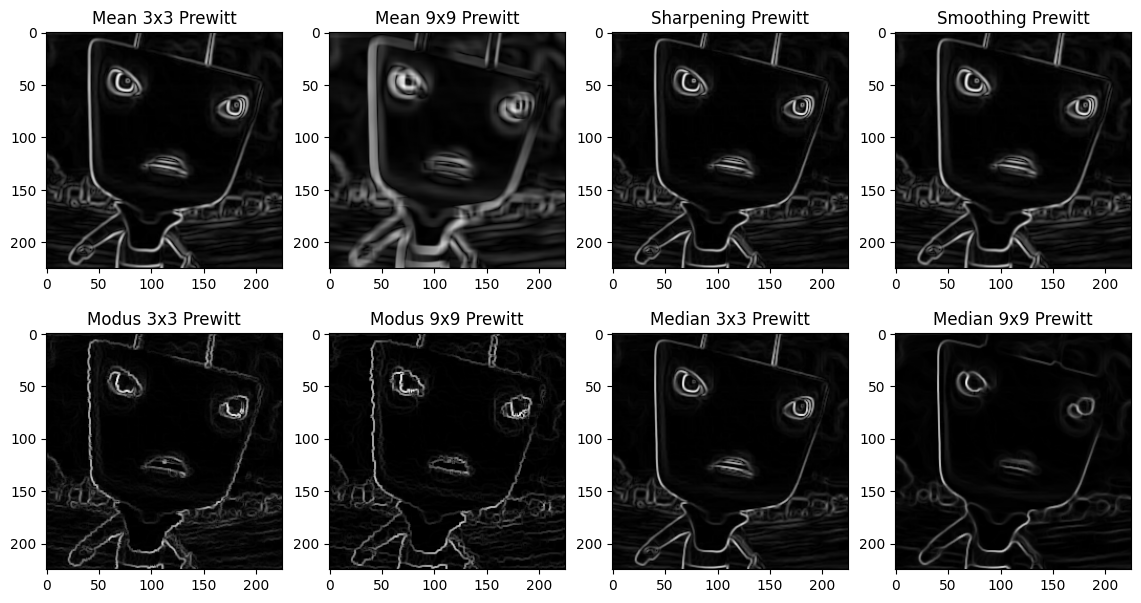

In [72]:
def operasi_prewitt(gambar):
    kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    
    m, n = gambar.shape
    prewitt_x = np.zeros((m, n), dtype=float)
    prewitt_y = np.zeros((m, n), dtype=float)
    
    padded = np.pad(gambar, ((1, 1), (1, 1)), mode='edge')
    
    for i in range(m):
        for j in range(n):
            patch = padded[i:i+3, j:j+3]
            prewitt_x[i, j] = (patch * kernel_x).sum()
            prewitt_y[i, j] = (patch * kernel_y).sum()
            
    return np.sqrt(prewitt_x**2 + prewitt_y**2)

adudu_mean_3x3_prewitt = operasi_prewitt(adudu_mean_3x3)
adudu_mean_9x9_prewitt = operasi_prewitt(adudu_mean_9x9)
adudu_sharpening_prewitt = operasi_prewitt(adudu_sharpening)
adudu_smoothing_prewitt = operasi_prewitt(adudu_smoothing)
adudu_modus_3x3_prewitt = operasi_prewitt(adudu_modus_3x3)
adudu_modus_9x9_prewitt = operasi_prewitt(adudu_modus_9x9)
adudu_median_3x3_prewitt = operasi_prewitt(adudu_median_3x3)
adudu_median_9x9_prewitt = operasi_prewitt(adudu_median_9x9)

plt.figure(figsize=(14, 15))
plt.subplot(4,4,1)
plt.imshow(adudu_mean_3x3_prewitt, cmap='gray')
plt.title('Mean 3x3 Prewitt')

plt.subplot(4,4,2)
plt.imshow(adudu_mean_9x9_prewitt, cmap='gray')
plt.title('Mean 9x9 Prewitt')

plt.subplot(4,4,3)
plt.imshow(adudu_sharpening_prewitt, cmap='gray')
plt.title('Sharpening Prewitt')

plt.subplot(4,4,4)
plt.imshow(adudu_smoothing_prewitt, cmap='gray')
plt.title('Smoothing Prewitt')

plt.subplot(4,4,5)
plt.imshow(adudu_modus_3x3_prewitt, cmap='gray')
plt.title('Modus 3x3 Prewitt')

plt.subplot(4,4,6)
plt.imshow(adudu_modus_9x9_prewitt, cmap='gray')
plt.title('Modus 9x9 Prewitt')

plt.subplot(4,4,7)
plt.imshow(adudu_median_3x3_prewitt, cmap='gray')
plt.title('Median 3x3 Prewitt')

plt.subplot(4,4,8)
plt.imshow(adudu_median_9x9_prewitt, cmap='gray')
plt.title('Median 9x9 Prewitt')

### Proses Pengolahan Gambar Boboiboy
Pada proses ini, gambar asli `boboiboy` dibaca menggunakan fungsi `plt.imread` dan diubah menjadi gambar grayscale menggunakan fungsi `ubah_ke_gray`. Selanjutnya, gambar grayscale tersebut diproses menggunakan filter mean dengan ukuran kernel 5x5 melalui fungsi `filter_mean`, menghasilkan gambar `boboiboy_mean`. Setelah itu, hasil dari filter mean diproses lebih lanjut menggunakan operasi Prewitt melalui fungsi `operasi_prewitt`, menghasilkan gambar `boboiboy_prewitt`.
Hasil dari setiap tahap pengolahan divisualisasikan menggunakan Matplotlib. Gambar pertama (`boboiboy_gray`) ditampilkan dalam subplot pertama dengan colormap grayscale, menggambarkan hasil konversi ke grayscale. Gambar kedua (`boboiboy_mean`) ditampilkan dalam subplot kedua, menunjukkan hasil dari filter mean. Gambar ketiga (`boboiboy_prewitt`) ditampilkan dalam subplot ketiga, memperlihatkan hasil dari operasi Prewitt. Visualisasi ini membantu memahami transformasi gambar pada setiap tahap pengolahan.

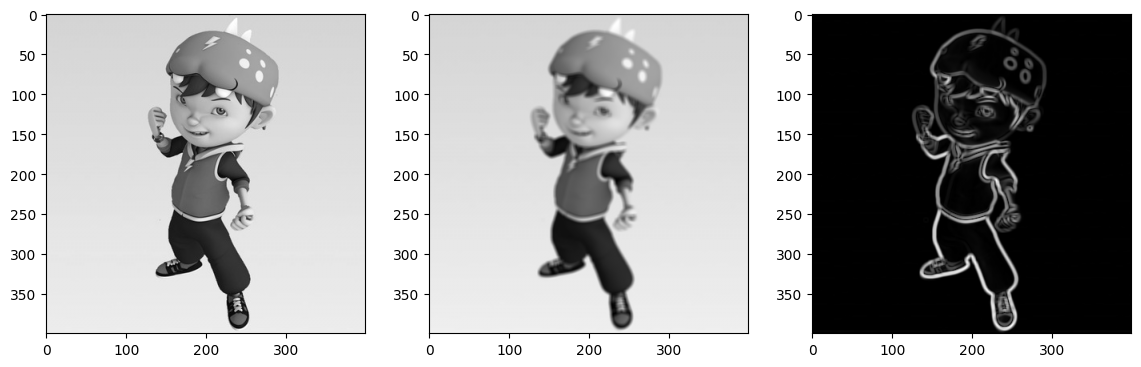

In [73]:
boboiboy = plt.imread('boboiboy.jpg')
boboiboy_gray = ubah_ke_gray(boboiboy)

boboiboy_mean = filter_mean(boboiboy_gray, 5)
boboiboy_prewitt = operasi_prewitt(boboiboy_mean)

plt.figure(figsize=(14, 15))

plt.subplot(3,3,1)
plt.imshow(boboiboy_gray, cmap='gray')

plt.subplot(3,3,2)
plt.imshow(boboiboy_mean, cmap='gray')

plt.subplot(3,3,3)
plt.imshow(boboiboy_prewitt, cmap='gray')

### Teknik Perbaikan dengan Metode Median Filter

Fungsi `putihkan_bagian_dalam` digunakan untuk memproses gambar dengan cara membandingkan setiap piksel dalam gambar dengan nilai batas tertentu. Jika nilai piksel lebih besar dari batas, maka piksel tersebut diubah menjadi 1.0, sedangkan jika lebih kecil atau sama dengan batas, piksel diubah menjadi 0.0. Fungsi ini menghasilkan gambar biner yang merepresentasikan area tertentu berdasarkan nilai batas. Selanjutnya, hasil dari fungsi ini, yaitu `boboiboy_putih`, diproses menggunakan filter median dengan ukuran kernel 3x3 melalui fungsi `filter_median`, menghasilkan gambar `boboiboy_putih_median`. Gambar-gambar ini kemudian divisualisasikan menggunakan Matplotlib. Gambar pertama (`boboiboy_putih`) ditampilkan dalam subplot pertama dengan colormap grayscale, sedangkan gambar kedua (`boboiboy_putih_median`) ditampilkan dalam subplot kedua dengan colormap yang sama. Visualisasi ini membantu untuk memahami hasil dari proses thresholding dan smoothing pada gambar.

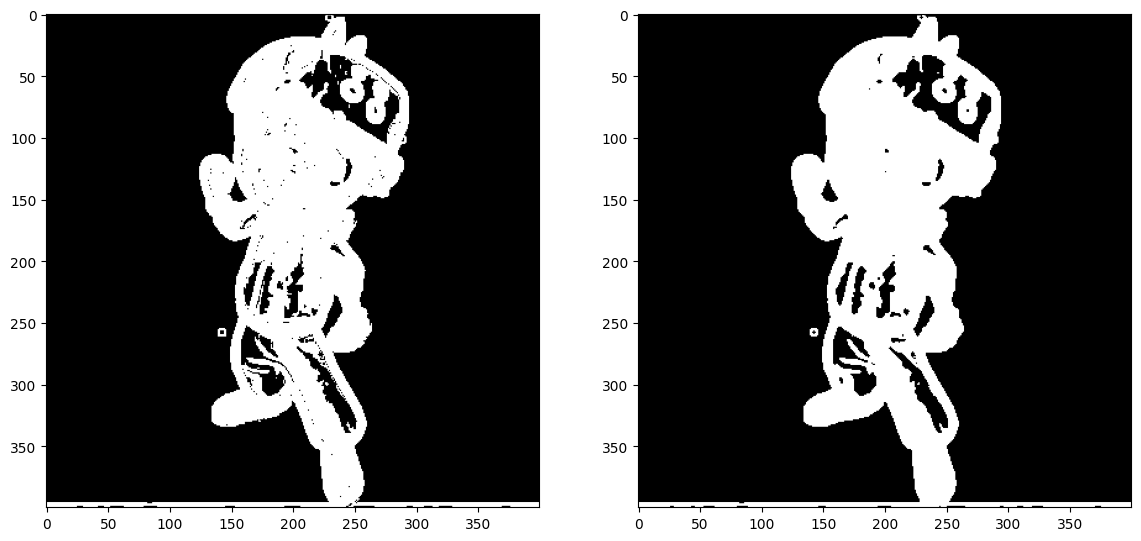

In [74]:
def putihkan_bagian_dalam(gambar, batas):
    m, n = gambar.shape
    out = np.zeros_like(gambar, dtype=float)
    
    for i in range(m):
        for j in range(n):
            if gambar[i, j] > batas:
                out[i, j] = 1.0
            else:
                out[i, j] = 0.0
    
    return out

boboiboy_putih = putihkan_bagian_dalam(boboiboy_prewitt, 3)
boboiboy_putih_median = filter_median(boboiboy_putih, 3)

plt.figure(figsize=(14, 15))

plt.subplot(2,2,1)
plt.imshow(boboiboy_putih, cmap='gray')

plt.subplot(2,2,2)
plt.imshow(boboiboy_putih_median, cmap='gray')

### Penggabungan Gambar-Gambar Hasil Filter
Kode ini mengekstrak saluran merah, hijau, dan biru dari gambar boboiboy dan menyimpannya masing-masing ke dalam variabel boboiboy_merah, boboiboy_hijau, dan boboiboy_biru. Selanjutnya, setiap saluran dikalikan dengan masker biner boboiboy_putih_median untuk menghasilkan versi yang telah difilter: boboiboy_merah_prewitt, boboiboy_hijau_prewitt, dan boboiboy_biru_prewitt. Gambar-gambar hasil filter ini menyoroti area tertentu berdasarkan masker. Kode ini menggunakan Matplotlib untuk memvisualisasikan saluran asli dan yang telah difilter dalam grid 3x3. Baris pertama menampilkan saluran merah, hijau, dan biru asli menggunakan colormap Reds, Greens, dan Blues. Baris kedua menampilkan saluran yang telah difilter dengan colormap yang sama, memungkinkan perbandingan yang jelas antara gambar asli dan hasil proses.

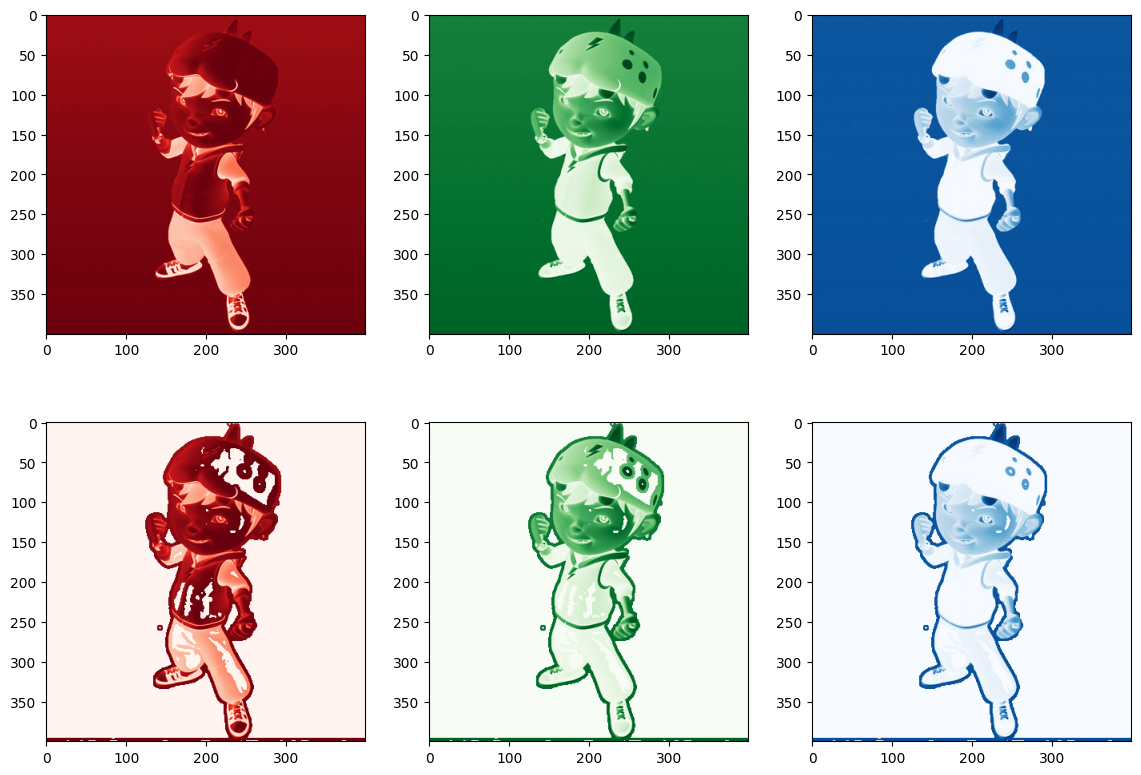

In [75]:
boboiboy_merah = boboiboy[:, :, 0]
boboiboy_hijau = boboiboy[:, :, 1]
boboiboy_biru = boboiboy[:, :, 2]

boboiboy_merah_prewitt = boboiboy_merah * boboiboy_putih_median
boboiboy_hijau_prewitt = boboiboy_hijau * boboiboy_putih_median
boboiboy_biru_prewitt = boboiboy_biru * boboiboy_putih_median

plt.figure(figsize=(14, 15))

plt.subplot(3,3,1)
plt.imshow(boboiboy_merah, cmap='Reds')

plt.subplot(3,3,2)
plt.imshow(boboiboy_hijau, cmap='Greens')

plt.subplot(3,3,3)
plt.imshow(boboiboy_biru, cmap='Blues')

plt.subplot(3,3,4)
plt.imshow(boboiboy_merah_prewitt, cmap='Reds')

plt.subplot(3,3,5)
plt.imshow(boboiboy_hijau_prewitt, cmap='Greens')

plt.subplot(3,3,6)
plt.imshow(boboiboy_biru_prewitt, cmap='Blues')

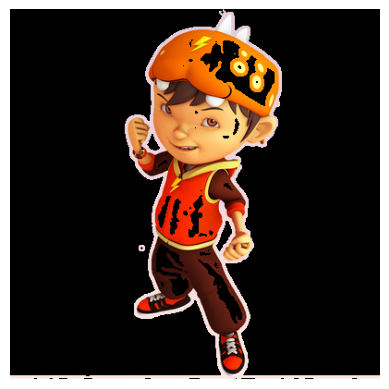

In [95]:
def boboiBoy_Ultimate_Final_Ultra_Instinct_RGB(merah, hijau, biru):

    def normalize(img):
        return (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-8)

    r = normalize(merah)
    g = normalize(hijau)
    b = normalize(biru)

    aura_rgb = np.stack([r, g, b], axis=-1)

    return aura_rgb

boboiboy_aura_rgb = boboiBoy_Ultimate_Final_Ultra_Instinct_RGB(
    boboiboy_merah_prewitt,
    boboiboy_hijau_prewitt,
    boboiboy_biru_prewitt
)

plt.imshow(boboiboy_aura_rgb)
plt.axis('off')
plt.show()
